## Logistic Regression on the Modified Training–Testing Split

In this experiment, we re-used the original training set from the cat versus non-cat dataset and created a new training–testing split based solely on those images. The total number of images in the original training set is 209. Following the project instructions, we constructed a new training set consisting of the first 160 images plus the last digit of the student ID. Since the last digit of the ID is 6, the new training set contains

$$
160 + 6 = 166
$$

images, and the remaining

$$
209 - 166 = 43
$$

images form the new test set. The original test set was discarded and not used in this part of the assignment.

Each image was flattened into a vector and normalized by dividing pixel values by 255 so that the inputs lie in the interval $[0, 1]$. We then trained a logistic regression classifier on the new training set. The model used a weight vector $w$ and a bias term $b$, and the sigmoid function

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

was applied to the linear scores $z = Xw + b$ to produce class probabilities. The parameters were optimized using gradient descent with the cross-entropy loss

$$
L = -\frac{1}{m} \sum_{i=1}^m \Big[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \Big],
$$

where $m$ is the size of the new training set and $\hat{y}_i$ is the predicted probability for the $i-th$ training example. We trained the model for 2500 epochs with a learning rate of 0.005.

After training, we obtained the following performance on the modified split:

- New training accuracy: **1.0**
- New testing accuracy: **0.5348837209302325**

The model fits the new training set perfectly but performs noticeably worse on the new test set, which indicates overfitting: the classifier has adapted very well to the 166 training examples but does not generalize as well to the remaining 43 images.

To analyze the errors more closely, we identified all indices in the new test set where the predicted labels differ from the true labels. Using zero-based indexing on the new test set, the misclassified indices are:

$$
[1,\ 3,\ 4,\ 5,\ 6,\ 7,\ 9,\ 11,\ 13,\ 17,\ 19,\ 22,\ 26,\ 29,\ 30,\ 31,\ 32,\ 34,\ 38,\ 39].
$$

We then displayed four of these misclassified test images using `matplotlib`, annotating each with its test-set index, true label, and predicted label. These visualizations help us see concrete examples where the model fails, and they highlight that with a reduced training set size and a simple linear model in a high-dimensional space, logistic regression can easily achieve perfect training accuracy while still misclassifying a substantial fraction of the test images.


New training accuracy: 1.0
New testing accuracy: 0.5348837209302325
Misclassified indices in new test set: [ 1  3  4  5  6  7  9 11 13 17 19 22 26 29 30 31 32 34 38 39]


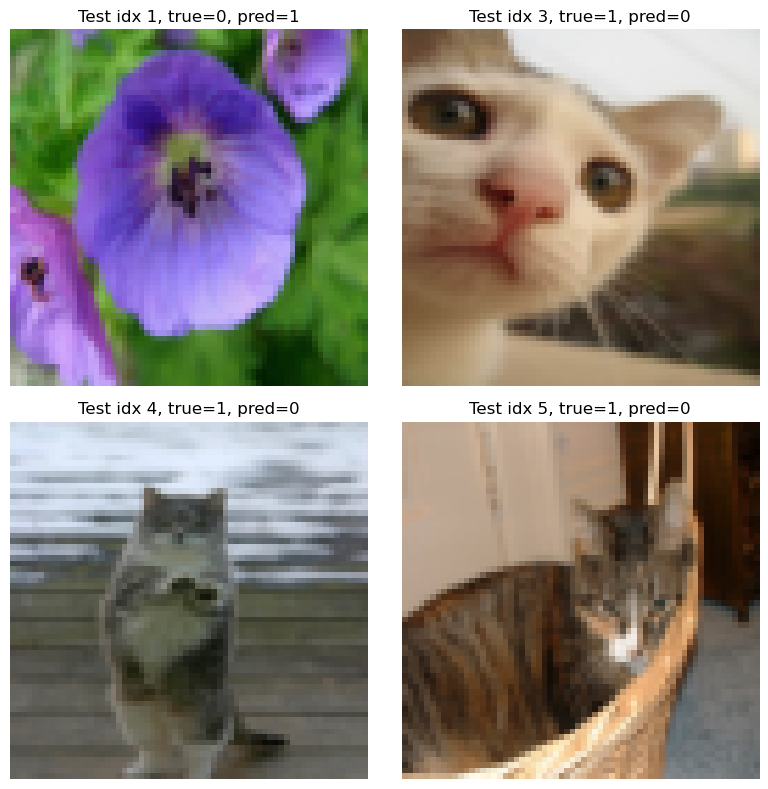

In [2]:
import numpy as np  # We import numpy so we can perform numerical computations and work with arrays
import matplotlib.pyplot as plt  # We import matplotlib so we can visualize images and plots
import h5py  # We import h5py so we can load the HDF5 cat versus non cat dataset

train_path = "train_catvnoncat.h5"  # We store the file name for the original training dataset which we will now re split

with h5py.File(train_path, "r") as train_file:  # We open the original training HDF5 file in read mode
    train_x_orig = np.array(train_file["train_set_x"][:])  # We load all original training images as a NumPy array
    train_y_orig = np.array(train_file["train_set_y"][:])  # We load all original training labels as a NumPy array
    classes = np.array(train_file["list_classes"][:])  # We load the list of class names for later interpretation

train_y_full = train_y_orig.reshape(-1)  # We reshape the original training labels to a one dimensional array

m_full = train_x_orig.shape[0]  # We store the total number of images in the original training set
num_px = train_x_orig.shape[1]  # We store the image height and width assuming square images

train_X_full = train_x_orig.reshape(m_full, -1) / 255.0  # We reshape all training images into row vectors and normalize pixel values
n_features = train_X_full.shape[1]  # We store the number of features which equals num_px times num_px times three channels

last_digit_id = 6  # We store the last digit of our student ID which will be used to define the new training size
new_train_size = 160 + last_digit_id  # We compute the size of the new training set as one hundred and sixty plus the last ID digit

new_train_X = train_X_full[:new_train_size, :]  # We select the first new_train_size images as the new training feature matrix
new_train_y = train_y_full[:new_train_size]  # We select the corresponding labels as the new training label array

new_test_X = train_X_full[new_train_size:, :]  # We select the remaining images as the new test feature matrix
new_test_y = train_y_full[new_train_size:]  # We select the corresponding labels as the new test label array

m_train_new = new_train_X.shape[0]  # We store the number of examples in the new training set
m_test_new = new_test_X.shape[0]  # We store the number of examples in the new test set

def sigmoid(z):  # We define the sigmoid function which maps real values to probabilities between zero and one
    return 1.0 / (1.0 + np.exp(-z))  # We compute and return the sigmoid of z elementwise

w = np.zeros(n_features)  # We initialize the weight vector w with zeros so we start from a neutral linear classifier
b = 0.0  # We initialize the bias term b with zero

learning_rate = 0.005  # We set the learning rate for gradient descent so that parameter updates are small and stable
num_epochs = 2500  # We set the number of epochs so the model has enough iterations to learn from the new split

loss_history = []  # We create a list to record the training loss value at each epoch for the new training set

for epoch in range(num_epochs):  # We iterate over the specified number of epochs to train the logistic regression model
    z_train = new_train_X @ w + b  # We compute the linear scores for all new training examples using the current parameters
    y_hat_train = sigmoid(z_train)  # We apply the sigmoid function to obtain predicted probabilities for class one
    eps = 1e-10  # We define a small constant eps to avoid numerical issues when taking logarithms
    loss = -np.mean(new_train_y * np.log(y_hat_train + eps) + (1.0 - new_train_y) * np.log(1.0 - y_hat_train + eps))  # We compute the average cross entropy loss over the new training set
    loss_history.append(loss)  # We append the current loss value to the history so we can inspect convergence later
    grad_w = new_train_X.T @ (y_hat_train - new_train_y) / m_train_new  # We compute the gradient of the loss with respect to w using the new training data
    grad_b = np.mean(y_hat_train - new_train_y)  # We compute the gradient of the loss with respect to b using the new training data
    w = w - learning_rate * grad_w  # We update the weight vector by moving opposite to the gradient direction
    b = b - learning_rate * grad_b  # We update the bias term by moving opposite to the gradient direction

z_train_final = new_train_X @ w + b  # We compute the final linear scores for the new training set using the trained parameters
y_hat_train_final = sigmoid(z_train_final)  # We convert the final scores into probabilities via the sigmoid function
y_pred_train = (y_hat_train_final >= 0.5).astype(int)  # We threshold the probabilities at one half to produce binary training predictions
train_accuracy_new = np.mean(y_pred_train == new_train_y)  # We compute the accuracy on the new training set as the fraction of correct predictions

z_test_final = new_test_X @ w + b  # We compute the final linear scores for the new test set using the trained parameters
y_hat_test_final = sigmoid(z_test_final)  # We convert the test scores into probabilities via the sigmoid function
y_pred_test = (y_hat_test_final >= 0.5).astype(int)  # We threshold the probabilities at one half to produce binary test predictions
test_accuracy_new = np.mean(y_pred_test == new_test_y)  # We compute the accuracy on the new test set as the fraction of correct predictions

print("New training accuracy:", train_accuracy_new)  # We print the accuracy on the new training set as required
print("New testing accuracy:", test_accuracy_new)  # We print the accuracy on the new test set as required

misclassified_indices_new = np.where(y_pred_test != new_test_y)[0]  # We find the indices in the new test set where predictions are incorrect
print("Misclassified indices in new test set:", misclassified_indices_new)  # We print the indices of all misclassified images in the new test set

num_to_show = min(4, misclassified_indices_new.shape[0])  # We decide to display up to four misclassified images or fewer if there are less than four

plt.figure(figsize=(8, 8))  # We create a new figure with a larger size so the misclassified images are clearly visible
for i in range(num_to_show):  # We loop over the first few misclassified indices to display their corresponding images
    idx_test = misclassified_indices_new[i]  # We take the i th misclassified index in the new test set
    orig_idx = new_train_size + idx_test  # We map this index back to the original training index for retrieving the image
    image = train_x_orig[orig_idx]  # We retrieve the original image from the full training image array
    true_label = new_test_y[idx_test]  # We retrieve the true label for this new test example
    pred_label = y_pred_test[idx_test]  # We retrieve the predicted label for this new test example
    plt.subplot(2, 2, i + 1)  # We select a subplot position in a two by two grid for the current misclassified image
    plt.imshow(image)  # We display the misclassified image in the current subplot
    plt.axis("off")  # We turn off the axis ticks to keep the focus on the image
    plt.title(f"Test idx {idx_test}, true={true_label}, pred={pred_label}")  # We set the title to show the test index and both labels
plt.tight_layout()  # We adjust the layout so that subplots and titles do not overlap
plt.savefig("task5_misclassified.png", dpi=300)
plt.show()  # We display the figure containing the misclassified images from the new test set
